In [1]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
import pandas as pd
tips = pd.get_dummies(tips, columns = ['sex', 'smoker','day','time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [4]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [6]:
X = tips[tips.columns.difference(['tip'])].values
y = tips['tip'].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [8]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [9]:
W

array([0.55935245, 0.87785699, 0.02268158, 0.39645845, 0.6760142 ,
       0.55032691, 0.18171424, 0.60583435, 0.82733106, 0.45641312,
       0.79340492, 0.2196319 ])

In [10]:
b

0.05429083845801763

In [11]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:,i] * W[i]
    predictions += b
    return predictions

In [12]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [16]:
def gradient(X, W, b, y):
    N = len(W)
    
    pred = model(X, W, b)
    dW = 1 / N * 2 * X.T.dot(pred - y) # feature 행렬과 error 벡터의 행렬벡터곱셈
    db = 2 * (pred - y).mean()
    
    return dW, db

In [17]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [  12.66548807   67.36695516   47.35214788   42.14160204   59.1954772
  110.33071596  458.01644383   98.72529131   70.80090184  123.76619626
   45.7599969  3745.0902508 ]
db: 8.337353761742548


In [18]:
lr = 0.0001
losses = []

In [19]:
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if  i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 1.8082
Iteration 20 : Loss 1.7898
Iteration 30 : Loss 1.7727
Iteration 40 : Loss 1.7563
Iteration 50 : Loss 1.7404
Iteration 60 : Loss 1.7250
Iteration 70 : Loss 1.7101
Iteration 80 : Loss 1.6958
Iteration 90 : Loss 1.6818
Iteration 100 : Loss 1.6684
Iteration 110 : Loss 1.6553
Iteration 120 : Loss 1.6427
Iteration 130 : Loss 1.6305
Iteration 140 : Loss 1.6186
Iteration 150 : Loss 1.6071
Iteration 160 : Loss 1.5960
Iteration 170 : Loss 1.5851
Iteration 180 : Loss 1.5746
Iteration 190 : Loss 1.5644
Iteration 200 : Loss 1.5545
Iteration 210 : Loss 1.5449
Iteration 220 : Loss 1.5355
Iteration 230 : Loss 1.5264
Iteration 240 : Loss 1.5176
Iteration 250 : Loss 1.5090
Iteration 260 : Loss 1.5006
Iteration 270 : Loss 1.4924
Iteration 280 : Loss 1.4845
Iteration 290 : Loss 1.4768
Iteration 300 : Loss 1.4693
Iteration 310 : Loss 1.4620
Iteration 320 : Loss 1.4548
Iteration 330 : Loss 1.4479
Iteration 340 : Loss 1.4411
Iteration 350 : Loss 1.4345
Iteration 360 : Loss 1.4280
I

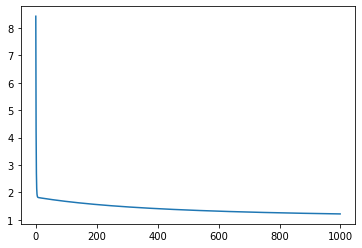

In [20]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [22]:
W, b

(array([0.43872658, 0.42336036, 0.30868171, 0.16519575, 0.34499926,
        0.36095678, 0.01311846, 0.51030351, 0.40247684, 0.24790766,
        0.4815253 , 0.08240861]),
 0.022267142071509188)

In [23]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6627432916998817

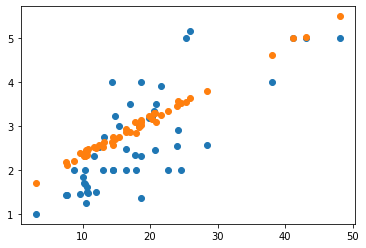

In [29]:
plt.scatter(X_test[:, -1], y_test)
plt.scatter(X_test[:, -1], prediction)
plt.show()

## 위 과정을 라이브러리로 진행

In [30]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

In [31]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

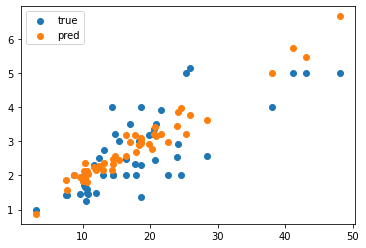

In [37]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()